In [1]:
import sys
sys.path.insert(0, '/home/ldoyle/packages')
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import pysindy as ps
from lr_ed import localreg
from datetime import datetime
from scipy.fft import fft, fftfreq,rfft2

import scipy.signal as signal
from obspy.signal import filter as obsfilt
import glob


In [2]:
WEAK = False

x_len = 5000
t_len = 6000

xs = np.arange(x_len)
dt = 1

library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]  

if WEAK:
    X, T = np.meshgrid(xs, np.arange(t_len))
    XT = np.asarray([X, T]).T

    pde_lib = ps.WeakPDELibrary(
        library_functions=library_functions,
        function_names=library_function_names,
        derivative_order=4,
        spatiotemporal_grid=XT,
        is_uniform=True,
        K=1000,
    )
else:
    
    pde_lib = ps.PDELibrary(
        library_functions=library_functions,
        function_names=library_function_names,
        derivative_order=4,
        spatial_grid=xs,
        include_bias=True,
        is_uniform=True,
    )
    

In [3]:
latlondepth = np.genfromtxt('south_DAS_latlondepth.txt')
relevant = latlondepth[6558:11558,3]
relevant = relevant - np.mean(relevant)
relevant = -(1/np.std(relevant))*relevant

In [4]:
h_shaped = np.tile(relevant.reshape(-1,1),t_len)
poly_library = ps.PolynomialLibrary(include_bias=True)


In [5]:
# inputs_per_library = [[1],[0,1]]
# tensor_array = [[1,1]]

In [6]:
generalized_library = ps.GeneralizedLibrary(
    [poly_library, pde_lib],
#     tensor_array=tensor_array,
#     inputs_per_library=inputs_per_library,
)

## Unfiltered

In [ ]:
path = "/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/"

init = 11
final= 16

time_subsample = 10
full_dat = np.zeros((5000,(12000//time_subsample)*(final-init)))

k = 0
for i in np.arange(init,final):
    file = "South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T23"+str(i)+"14Z.h5"
    f = h5py.File(path+file, 'r')
    data = f['Acquisition']['Raw[0]']['RawData'][:, :].astype('int64')
#     timestamp = f['Acquisition']['Raw[0]']['RawDataTime'][:] / 1000000
    f.close()
    
    full_dat[:,k*(12000//time_subsample):(k+1)*(12000//time_subsample)] = data[7500:12500,::time_subsample]
    k+=1
    
working_dat = full_dat/np.std(full_dat)


In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(working_dat, vmin=-5.,vmax=5.)
plt.show()

In [ ]:

working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)


### Dataset 1

In [ ]:
thresh = 1e-4
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 1e-6
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )


In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 1e-8
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

### Dataset 2

In [ ]:
time_subsample = 10
full_dat = np.zeros((5000,6000))

k = 0
for i in np.arange(21,26):
    file = "South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T23"+str(i)+"14Z.h5"
    f = h5py.File(path+file, 'r')
    data = f['Acquisition']['Raw[0]']['RawData'][:, :].astype('int64')
#     timestamp = f['Acquisition']['Raw[0]']['RawDataTime'][:] / 1000000
    f.close()
    
    full_dat[:,k*(12000//time_subsample):(k+1)*(12000//time_subsample)] = data[7500:12500,::time_subsample]
    k+=1
    


In [ ]:
working_dat = full_dat/np.std(full_dat)#*10**6
working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)


In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(working_dat[:,:,0], vmin=-5.,vmax=5.)
plt.show()

In [ ]:
thresh = 1e-4
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 1e-6
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )


In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 1e-8
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

## Gaussian Filtered



In [ ]:
file_list = glob.glob("/home/ldoyle/notebooks/rad_10_smooth_data/*")

In [ ]:
# n = 1.4682
# L = 51.04762
working_dat = np.zeros((5000,6000))
b=0
for q in np.arange(5):
#     if b==0:
#         working_dat = np.load(file_list[q])
#         b=1
#     else:
#         working_dat = np.hstack((working_dat, np.load(file_list[q])))
    working_dat[:,q*(1200):(q+1)*1200] = np.load(file_list[q])[:,::10]
        
# working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat[:,::10]
working_dat = working_dat/(np.std(working_dat))
working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(working_dat[:,:,0])
plt.show()

In [ ]:
xs = np.arange(working_dat.shape[0])
print(xs.shape)

### Dataset 1

In [ ]:
thresh = 1.
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 0.4
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 0.2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 0.1
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

### Dataset 2

In [ ]:
working_dat = np.zeros((5000,6000))
b=0
for q in np.arange(10,15):

    working_dat[:,b*(1200):(b+1)*1200] = np.load(file_list[q])[:,::10]
    b+=1
# working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat[:,::10]
working_dat = working_dat/(np.std(working_dat))
working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(working_dat[:,:,0])
plt.show()

In [ ]:
thresh = 1.
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 0.4
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 0.2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

In [ ]:
thresh = 0.1
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

In [ ]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

## Drift Removal Load

In [7]:
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")[:,::10]
scaler_val = np.std(working_dat)
scaled_dat = working_dat/scaler_val
working_dat = np.stack((scaled_dat,h_shaped), axis=-1)
xs = np.arange(working_dat.shape[0])

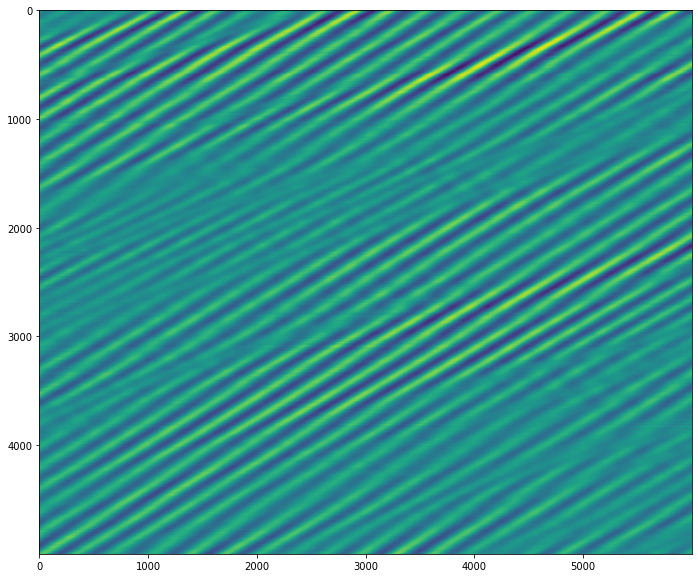

In [8]:
plt.figure(figsize=(12,10))
plt.imshow(working_dat[:,:,0])
plt.show()

In [77]:
thresh = 0.01
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.01))

In [78]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.01
(x0)' = 0.221 x0_1 + 0.103 x0_111


In [10]:
thresh = 0.09
optimizer = ps.EnsembleOptimizer( opt=ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=50),bagging=True,  n_models = 10,n_subset =200) #int(t_len*0.01))#opt=ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=10)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True )

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.09) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.generalized_library.GeneralizedLibrary object at 0x7fa53088a250>,
      feature_names=['x0', 'x1'],
      optimizer=EnsembleOptimizer(bagging=True, n_models=10, n_subset=200,
                                  opt=STLSQ(alpha=0.001, max_iter=50,
                                            threshold=0.09)))

In [11]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.09
(x0)' = 0.235 x0_1 + 0.107 x0_111
(x1)' = 0.000


In [30]:
np.random.seed(41)
thresh = 0.015
optimizer = ps.EnsembleOptimizer( opt=ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=100),bagging=True,  n_models = 20,n_subset =200) #int(t_len*0.01))#opt=ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=10)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True )

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.015) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.generalized_library.GeneralizedLibrary object at 0x7fa53088a250>,
      feature_names=['x0', 'x1'],
      optimizer=EnsembleOptimizer(bagging=True, n_subset=200,
                                  opt=STLSQ(alpha=0.001, max_iter=100,
                                            threshold=0.015)))

In [31]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.015
(x0)' = 0.246 x0_1 + 0.106 x0_111 + -0.013 x0x1_1 + -0.012 x1x0_1 + -0.021 x0x0x1_1 + -0.009 x1x1x1_1
(x1)' = 0.000


### Dataset 2

In [36]:
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-02T051114Z.npy")[:,::10]
scaler_val = np.std(working_dat)
scaled_dat = working_dat/scaler_val
working_dat = np.stack((scaled_dat,h_shaped), axis=-1)
xs = np.arange(working_dat.shape[0])

In [39]:
thresh = 0.009
optimizer = ps.EnsembleOptimizer( opt=ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=100),bagging=True,  n_models = 20,n_subset =200) #int(t_len*0.01))#opt=ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=10)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True )

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.009) and eliminated all coefficients
  warnings.warn(
/home/ldoyle/packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sp

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.generalized_library.GeneralizedLibrary object at 0x7fa53088a250>,
      feature_names=['x0', 'x1'],
      optimizer=EnsembleOptimizer(bagging=True, n_subset=200,
                                  opt=STLSQ(alpha=0.001, max_iter=100,
                                            threshold=0.009)))

In [40]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.009
(x0)' = 0.220 x0_1 + 0.103 x0_111 + -0.009 x0x1_1
(x1)' = 0.000


In [84]:
thresh = 0.01
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.01))

In [85]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.01
(x0)' = 0.145 x0_1 + 0.068 x0_111


In [90]:
thresh = 5e-3
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )


# library_ensemble_coefs = model.coef_list
# mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
# std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.005))

In [91]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.005
(x0)' = 0.145 x0_1 + 0.068 x0_111


In [88]:
thresh = 0.002
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.002))

In [89]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.002
(x0)' = 0.157 x0_1 + 0.075 x0_111 + -0.008 x0x0x0_1 + -0.005 x0x0x0_111


## Multifilt

In [93]:
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-02T051114Z.npy")
scaler_val = np.std(working_dat)
scaled_dat = working_dat/scaler_val
working_dat = np.stack((scaled_dat,h_shaped), axis=-1)


### Dataset 1

In [96]:
thresh = 5e-1
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )


SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.5))

In [97]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.5
(x0)' = 0.568 x0_1 + 3.874 x0_111


In [98]:
thresh = 1e-1
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'], optimizer=STLSQ(alpha=0.001, max_iter=100))

In [99]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.1
(x0)' = 0.568 x0_1 + 3.828 x0_111 + 0.033 x0x0x0_111


In [100]:
thresh = 5e-2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.05))

In [101]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.05
(x0)' = 0.568 x0_1 + 3.828 x0_111 + 0.033 x0x0x0_111


In [110]:
thresh = 3e-2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.03))

In [111]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.03
(x0)' = 0.568 x0_1 + 3.828 x0_111 + -0.008 x0_1111 + 0.033 x0x0x0_111


### Dataset 2

In [116]:
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-02T231114Z.npy")
scaler_val = np.std(working_dat)
scaled_dat = working_dat/scaler_val
working_dat = np.stack((scaled_dat,h_shaped), axis=-1)


In [117]:
thresh = 5e-1
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.5))

In [118]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.5
(x0)' = 0.514 x0_1 + 3.516 x0_111


In [119]:
thresh = 0.1
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'], optimizer=STLSQ(alpha=0.001, max_iter=100))

In [120]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.1
(x0)' = 0.514 x0_1 + 3.516 x0_111


In [123]:
thresh = 5e-2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )


# library_ensemble_coefs = model.coef_list
# mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
# std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.05))

In [124]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.05
(x0)' = 0.514 x0_1 + 3.499 x0_111 + 0.013 x0x0x0_111


In [121]:
thresh = 3e-2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )


# library_ensemble_coefs = model.coef_list
# mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
# std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.03))

In [122]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.03
(x0)' = 0.514 x0_1 + 3.499 x0_111 + 0.013 x0x0x0_111 + -0.002 x0x0_1111


In [47]:
thresh = 1e-2
optimizer = ps.EnsembleOptimizer(threshold=thresh, alpha=0.001, max_iter=100)
model = ps.SINDy(feature_library=generalized_library, optimizer=optimizer)
model.fit(working_dat, t=dt )

SINDy(differentiation_method=FiniteDifference(axis=1),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7fdc84057940>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=0.001, max_iter=100, threshold=0.01))

In [48]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.01
(x0)' = 0.572 x0_1 + 3.842 x0_111 + 0.002 x0_1111 + 0.014 x0x0x0_111 + -0.002 x0x0x0_1111
